<a href="https://colab.research.google.com/github/rohansdesai/rohandesai/blob/main/Linear_regression_29012024_10032024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Linear regression practice to solve real-life example

Courtsey: Course ML course by Andrew Ng
Course link: https://www.coursera.org/learn/supervised-learning-regression-classification

In [1]:
## Step-1 Data readiness

# Access csv file from my github repository
url = 'https://raw.githubusercontent.com/rohansdesai/rohandesai/main/Real_estate.csv'

# load data into colab
import pandas as pd
df = pd.read_csv(url, usecols=['X2 house age','Y house price of unit area'])

# consider only 300 rows from csv as training data, remaining 100 rows will be used for validation, last 14 rows for inference
df_train = df.head(300)
df_validation = df[300:400]
df_infer = df.tail(14)

# Load training data into arrays
x_train = df_train["X2 house age"].values
y_train = df_train["Y house price of unit area"].values



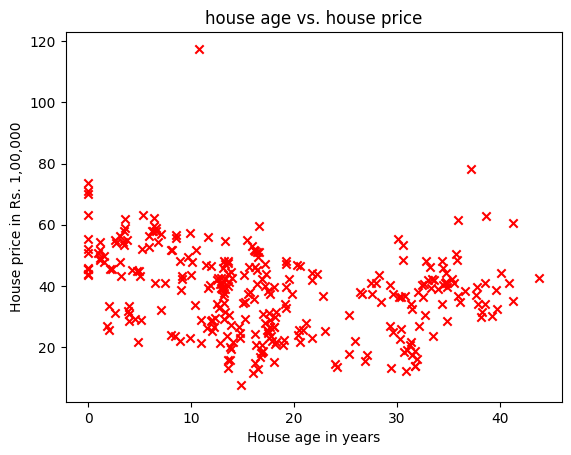

In [2]:
## Step-2 Visualise training data

# Create a scatter plot of the data. To change the markers to red "x",
# we used the 'marker' and 'c' parameters
import matplotlib.pyplot as plt
plt.scatter(x_train, y_train, marker='x', c='r')

# Set the title
plt.title("house age vs. house price")
# Set the y-axis label
plt.ylabel('House price in Rs. 1,00,000')
# Set the x-axis label
plt.xlabel('House age in years')
plt.show()

<a name="toc_40291_2.1"></a>
## Gradient descent summary
So far in this course, you have developed a linear model that predicts $f_{w,b}(x^{(i)})$:
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b \tag{1}$$
In linear regression, you utilize input training data to fit the parameters $w$,$b$ by minimizing a measure of the error between our predictions $f_{w,b}(x^{(i)})$ and the actual data $y^{(i)}$. The measure is called the $cost$, $J(w,b)$. In training you measure the cost over all of our training samples $x^{(i)},y^{(i)}$
$$J(w,b) = \frac{1}{2m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})^2\tag{2}$$

In [3]:
## Step-3 Train the model i.e. arrive at y = wx+b equation fitting the given training data
# we will use gradient discent alorithm to arrive at the optimum values of w & b i.e. a point where cost function converges

#Step 3.1 Compute cost

def compute_cost(x, y, w, b):

    m = x.shape[0]
    cost = 0

    for i in range(m):
        f_wb = w * x[i] + b
        cost = cost + (f_wb - y[i])**2
    total_cost = 1 / (2 * m) * cost

    return total_cost


In lecture, *gradient descent* was described as:

$$\begin{align*} \text{repeat}&\text{ until convergence:} \; \lbrace \newline
\;  w &= w -  \alpha \frac{\partial J(w,b)}{\partial w} \tag{3}  \; \newline
 b &= b -  \alpha \frac{\partial J(w,b)}{\partial b}  \newline \rbrace
\end{align*}$$
where, parameters $w$, $b$ are updated simultaneously.  
The gradient is defined as:
$$
\begin{align}
\frac{\partial J(w,b)}{\partial w}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)})x^{(i)} \tag{4}\\
  \frac{\partial J(w,b)}{\partial b}  &= \frac{1}{m} \sum\limits_{i = 0}^{m-1} (f_{w,b}(x^{(i)}) - y^{(i)}) \tag{5}\\
\end{align}
$$

Here *simultaniously* means that you calculate the partial derivatives for all the parameters before updating any of the parameters.

<a name="toc_40291_2.2"></a>
## Implement Gradient Descent
You will implement gradient descent algorithm for one feature. You will need three functions.
- `compute_gradient` implementing equation (4) and (5) above
- `compute_cost` implementing equation (2) above (code from previous lab)
- `gradient_descent`, utilizing compute_gradient and compute_cost

Conventions:
- The naming of python variables containing partial derivatives follows this pattern,$\frac{\partial J(w,b)}{\partial b}$  will be `dj_db`.
- w.r.t is With Respect To, as in partial derivative of $J(wb)$ With Respect To $b$.


<a name="toc_40291_2.3"></a>
### compute_gradient
<a name='ex-01'></a>
`compute_gradient`  implements (4) and (5) above and returns $\frac{\partial J(w,b)}{\partial w}$,$\frac{\partial J(w,b)}{\partial b}$. The embedded comments describe the operations.

In [4]:
# Step 3.2 Compute Gradient
def compute_gradient(x, y, w, b):
    """
    Computes the gradient for linear regression
    Args:
      x (ndarray (m,)): Data, m examples
      y (ndarray (m,)): target values
      w,b (scalar)    : model parameters
    Returns
      dj_dw (scalar): The gradient of the cost w.r.t. the parameters w
      dj_db (scalar): The gradient of the cost w.r.t. the parameter b
     """

    # Number of training examples
    m = x.shape[0]
    dj_dw = 0
    dj_db = 0

    for i in range(m):
        f_wb = w * x[i] + b
        dj_dw_i = (f_wb - y[i]) * x[i]
        dj_db_i = f_wb - y[i]
        dj_db += dj_db_i
        dj_dw += dj_dw_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_dw, dj_db

### Learning parameters using batch gradient descent

You will now find the optimal parameters of a linear regression model by using batch gradient descent. Recall batch refers to running all the examples in one iteration.

- A good way to verify that gradient descent is working correctly is to look
at the value of $J(w,b)$ and check that it is decreasing with each step.

- Assuming you have implemented the gradient and computed the cost correctly and you have an appropriate value for the learning rate alpha, $J(w,b)$ should never increase and should converge to a steady value by the end of the algorithm.

In [5]:
# Step 3.3 Gradient Descent
# Comput cost (#3.1) & compute gradient (#3.2) will be called inside function #3.3 for every iteration

import math

def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost_function, gradient_function):
    """
    Performs gradient descent to fit w,b. Updates w,b by taking
    num_iters gradient steps with learning rate alpha

    Args:
      x (ndarray (m,))  : Data, m examples
      y (ndarray (m,))  : target values
      w_in,b_in (scalar): initial values of model parameters
      alpha (float):     Learning rate
      num_iters (int):   number of iterations to run gradient descent
      cost_function:     function to call to produce cost
      gradient_function: function to call to produce gradient

    Returns:
      w (scalar): Updated value of parameter after running gradient descent
      b (scalar): Updated value of parameter after running gradient descent
      J_history (List): History of cost values
      p_history (list): History of parameters [w,b]
    """
    # no. of training examples
    m = len(x)

    # An array to store all values of J (cost) & w,b (parameter) to observe model's learning progress
    J_history = []
    p_history = []
    w = w_in
    b = b_in

    for i in range(num_iters):

        # calculate gradient & update parameters
        dj_dw, dj_db = gradient_function(x, y, w, b)

        # update paramaters suing w, b,alpha & gradient
        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        # Save cost J at each iteration
        if i < 100000:      # condition to prevent resource exhausion
            J_history.append (cost_function(x, y, w, b))
            p_history.append ([w,b])

        # print cost at every 10th iteration or as many iterations if num_iters is less than 10
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b: {b: 0.5e} ")

    return w, b, J_history, p_history


### Invoke Gradien Descent function

You have reached the last step...  

In [6]:
# initialize parameters
w_init = 0
b_init = 0

# some gradient descent settings
iterations = 55000
tmp_alpha = 1.0e-4

# run gradient descent
w_final, b_final, j_hist, p_hist = gradient_descent(x_train, y_train, w_init, b_init, tmp_alpha, iterations, compute_cost, compute_gradient)
print (f"(w,b) found by gradient descent are: ({w_final: 8.4f}, {b_final: 8.4f})")


Iteration    0: Cost 7.79e+02  dj_dw: -6.402e+02, dj_db: -3.803e+01   w:  6.402e-02, b:  3.80317e-03 
Iteration 5500: Cost 2.87e+02  dj_dw:  4.238e-01, dj_db: -1.059e+01   w:  1.180e+00, b:  6.36454e+00 
Iteration 11000: Cost 2.34e+02  dj_dw:  3.623e-01, dj_db: -9.051e+00   w:  9.648e-01, b:  1.17545e+01 
Iteration 16500: Cost 1.96e+02  dj_dw:  3.096e-01, dj_db: -7.736e+00   w:  7.804e-01, b:  1.63616e+01 
Iteration 22000: Cost 1.67e+02  dj_dw:  2.647e-01, dj_db: -6.613e+00   w:  6.228e-01, b:  2.02994e+01 
Iteration 27500: Cost 1.47e+02  dj_dw:  2.262e-01, dj_db: -5.652e+00   w:  4.880e-01, b:  2.36653e+01 
Iteration 33000: Cost 1.31e+02  dj_dw:  1.934e-01, dj_db: -4.831e+00   w:  3.729e-01, b:  2.65423e+01 
Iteration 38500: Cost 1.20e+02  dj_dw:  1.653e-01, dj_db: -4.129e+00   w:  2.745e-01, b:  2.90014e+01 
Iteration 44000: Cost 1.12e+02  dj_dw:  1.413e-01, dj_db: -3.530e+00   w:  1.904e-01, b:  3.11032e+01 
Iteration 49500: Cost 1.06e+02  dj_dw:  1.207e-01, dj_db: -3.017e+00   w:  

### Evaluate the linear regression function with test data



In [8]:
# use validation data set to check the accuracy of the liner regression equation i.e. model
x_validation = df_validation["X2 house age"].values
y_validation = df_validation["Y house price of unit area"].values

import numpy as np

m = x_validation.shape[0]
predicted = np.zeros(m)

for i in range(m):
    predicted[i] = w_final * x_validation[i] + b_final
    print(f"difference between real value and predicted value for the {i} iteration = {predicted[i] - y_validation[i]} \n")




difference between real value and predicted value for the 0 iteration = -2.322328899235991 

difference between real value and predicted value for the 1 iteration = 0.9012657987693089 

difference between real value and predicted value for the 2 iteration = 12.175708446456238 

difference between real value and predicted value for the 3 iteration = -1.7816334009658519 

difference between real value and predicted value for the 4 iteration = 6.175217782879301 

difference between real value and predicted value for the 5 iteration = -19.641392353808598 

difference between real value and predicted value for the 6 iteration = -14.943997155397597 

difference between real value and predicted value for the 7 iteration = 10.322291907649682 

difference between real value and predicted value for the 8 iteration = -17.629991820298706 

difference between real value and predicted value for the 9 iteration = 17.06234525863858 

difference between real value and predicted value for the 10 iterati

Text(0.5, 0, 'House age in years')

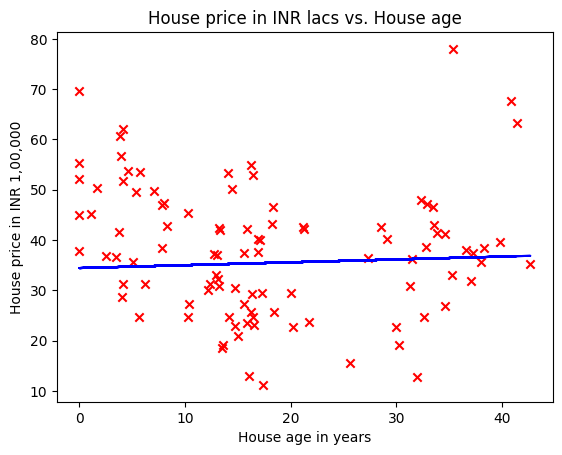

In [21]:
# plot the model outcome to visualize model fitment
import matplotlib.pyplot as plt

# Plot the linear fit
plt.plot(x_validation, predicted, c = "b")

# Create a scatter plot of the data.
plt.scatter(x_validation, y_validation, marker='x', c='r')

# Set the title
plt.title("House price in INR lacs vs. House age")
# Set the y-axis label
plt.ylabel('House price in INR 1,00,000')
# Set the x-axis label
plt.xlabel('House age in years')

